In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score

**Step 1: Load and Inspect the Dataset**

In [2]:
# Load dataset
df = pd.read_csv('/content/TITAN.csv')

In [3]:
# Display first few rows
print(df.head())

         Date Symbol Series  Prev Close   Open    High    Low    Last   Close  \
0  2000-01-03  TITAN     EQ      144.95  146.0  156.45  146.0  155.00  155.70   
1  2000-01-04  TITAN     EQ      155.70  152.0  152.00  144.0  148.05  147.40   
2  2000-01-05  TITAN     EQ      147.40  144.0  148.80  136.0  139.95  138.40   
3  2000-01-06  TITAN     EQ      138.40  142.0  149.50  141.0  149.50  149.50   
4  2000-01-07  TITAN     EQ      149.50  149.5  153.00  145.0  147.75  146.35   

     VWAP  Volume      Turnover  Trades  Deliverable Volume  %Deliverble  
0  154.36   23000  3.550370e+11     NaN                 NaN          NaN  
1  146.72   26300  3.858700e+11     NaN                 NaN          NaN  
2  142.95   20600  2.944850e+11     NaN                 NaN          NaN  
3  147.87   31600  4.672750e+11     NaN                 NaN          NaN  
4  148.63   36600  5.439965e+11     NaN                 NaN          NaN  


In [4]:
# Display basic statistics
print(df.describe())

        Prev Close         Open         High          Low         Last  \
count  5306.000000  5306.000000  5306.000000  5306.000000  5306.000000   
mean    709.230692   709.989926   723.312816   696.430767   709.449114   
std     785.170900   785.435092   799.085424   772.183889   784.995523   
min      27.500000    27.000000    28.800000    27.000000    27.750000   
25%     192.262500   192.625000   198.800000   189.500000   192.837500   
50%     396.150000   398.250000   404.525000   391.125000   397.025000   
75%    1017.725000  1018.925000  1046.500000   991.187500  1020.000000   
max    4714.600000  4730.000000  4754.950000  4559.900000  4734.000000   

             Close         VWAP        Volume      Turnover         Trades  \
count  5306.000000  5306.000000  5.306000e+03  5.306000e+03    2456.000000   
mean    709.484499   710.415443  1.172596e+06  7.796053e+13   47241.859935   
std     785.206121   786.266584  1.763858e+06  1.378542e+14   43331.439701   
min      27.500000   

In [5]:
df.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5306 non-null   object 
 1   Symbol              5306 non-null   object 
 2   Series              5306 non-null   object 
 3   Prev Close          5306 non-null   float64
 4   Open                5306 non-null   float64
 5   High                5306 non-null   float64
 6   Low                 5306 non-null   float64
 7   Last                5306 non-null   float64
 8   Close               5306 non-null   float64
 9   VWAP                5306 non-null   float64
 10  Volume              5306 non-null   int64  
 11  Turnover            5306 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4792 non-null   float64
 14  %Deliverble         4792 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 621.9

In [7]:
df.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
5301,2021-04-26,TITAN,EQ,1461.45,1470.0,1489.75,1465.15,1478.95,1479.85,1479.58,1020499,1.509913e+14,39416.0,228386.0,0.2238
5302,2021-04-27,TITAN,EQ,1479.85,1485.0,1503.55,1482.00,1498.00,1495.10,1494.21,1145908,1.712228e+14,42363.0,298862.0,0.2608
5303,2021-04-28,TITAN,EQ,1495.10,1505.0,1514.90,1491.70,1509.00,1508.85,1504.73,1037771,1.561564e+14,37985.0,212098.0,0.2044
5304,2021-04-29,TITAN,EQ,1508.85,1524.0,1527.50,1497.00,1504.35,1506.80,1510.30,1927546,2.911181e+14,63568.0,492144.0,0.2553
5305,2021-04-30,TITAN,EQ,1506.80,1500.0,1516.55,1471.00,1489.85,1491.65,1493.26,3691399,5.512201e+14,111986.0,699586.0,0.1895


In [8]:
df.shape

(5306, 15)

**Step 2: Exploratory Data Analysis (EDA)**

In [9]:
# Check for missing values
print(df.isnull().sum())

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     514
%Deliverble            514
dtype: int64


In [10]:
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
         Date Symbol Series  Prev Close   Open    High    Low    Last   Close  \
0  2000-01-03  TITAN     EQ      144.95  146.0  156.45  146.0  155.00  155.70   
1  2000-01-04  TITAN     EQ      155.70  152.0  152.00  144.0  148.05  147.40   
2  2000-01-05  TITAN     EQ      147.40  144.0  148.80  136.0  139.95  138.40   
3  2000-01-06  TITAN     EQ      138.40  142.0  149.50  141.0  149.50  149.50   
4  2000-01-07  TITAN     EQ      149.50  149.5  153.00  145.0  147.75  146.35   

     VWAP  Volume      Turnover  Trades  Deliverable Volume  %Deliverble  
0  154.36   23000  3.550370e+11     NaN                 NaN          NaN  
1  146.72   26300  3.858700e+11     NaN                 NaN          NaN  
2  142.95   20600  2.944850e+11     NaN                 NaN          NaN  
3  147.87   31600  4.672750e+11     NaN                 NaN          NaN  
4  148.63   36600  5.439965e+11     NaN                 NaN          NaN  


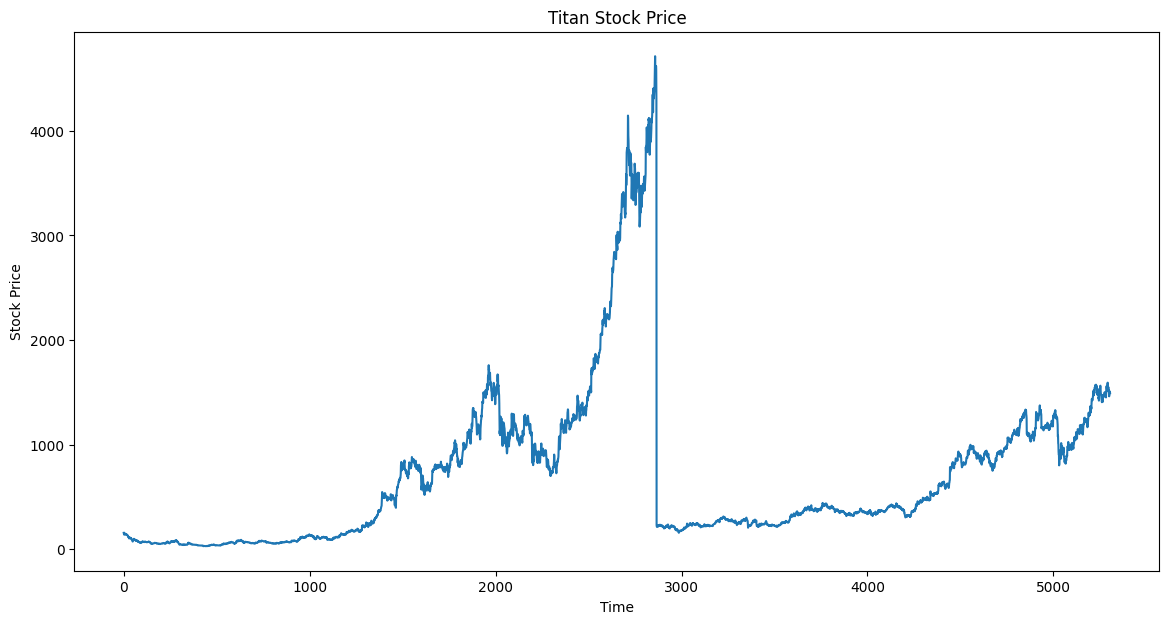

In [11]:
# Plotting the closing price
plt.figure(figsize=(14, 7))
plt.plot(df['Close'])
plt.title('Titan Stock Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.show()

In [12]:
# Data Preprocessing for all models
# Filling missing values (if any)
df.fillna(method='ffill', inplace=True)

In [13]:
# Feature selection and scaling
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

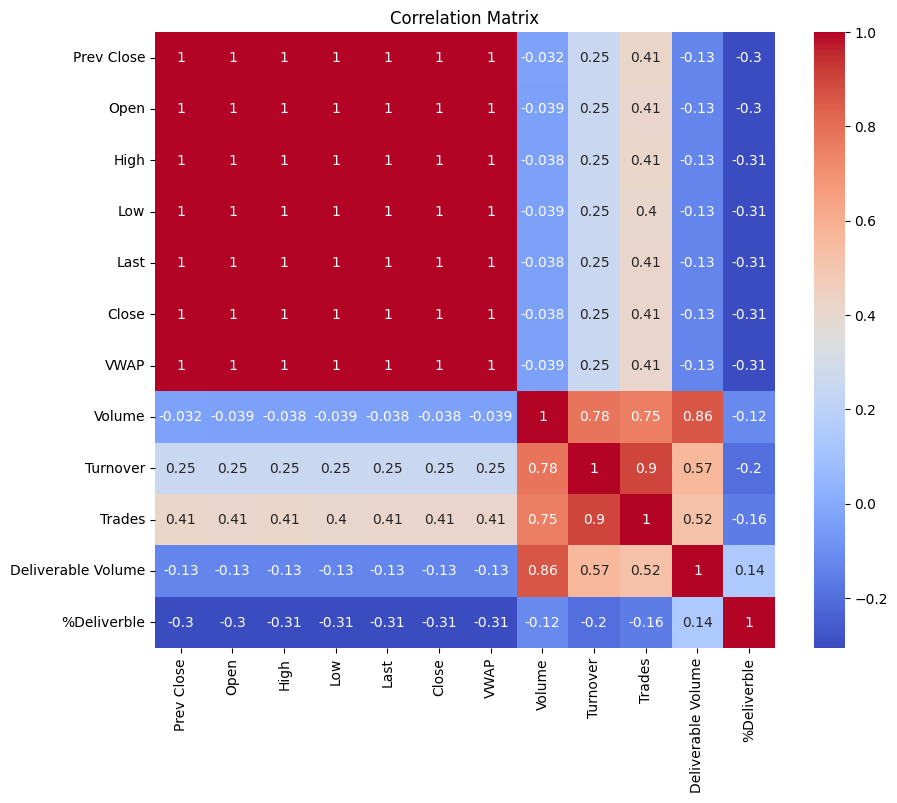

In [14]:
# Select only numeric columns before calculating the correlation
numeric_df = df.select_dtypes(include=['number'])

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

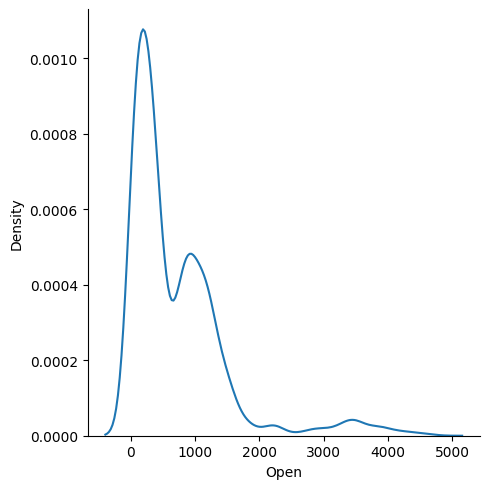

In [15]:
#Open Stock Price According to their density
sns.displot(df["Open"], kind="kde")

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')


<Axes: xlabel='Open', ylabel='High'>

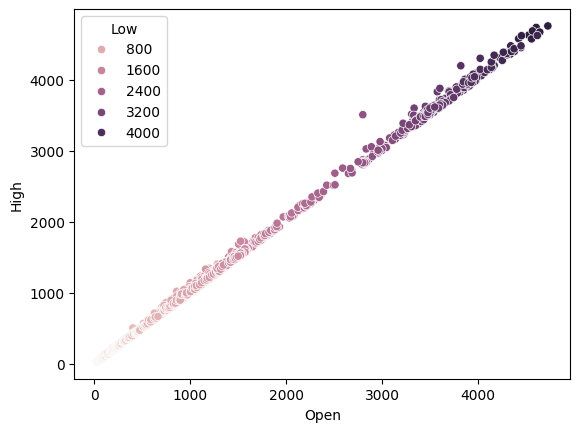

In [16]:
# About The Adj Close, High and low Stock prices
# Verify the correct column name in your DataFrame
print(df.columns)  # Print the columns to check for typos or case sensitivity

# Assuming the correct column name is 'Adj Close' (adjust if necessary)
sns.scatterplot(x="Open", y="High", hue="Low", data=df)

array([[<Axes: title={'center': 'Prev Close'}>,
        <Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Last'}>,
        <Axes: title={'center': 'Close'}>],
       [<Axes: title={'center': 'VWAP'}>,
        <Axes: title={'center': 'Volume'}>,
        <Axes: title={'center': 'Turnover'}>],
       [<Axes: title={'center': 'Trades'}>,
        <Axes: title={'center': 'Deliverable Volume'}>,
        <Axes: title={'center': '%Deliverble'}>]], dtype=object)

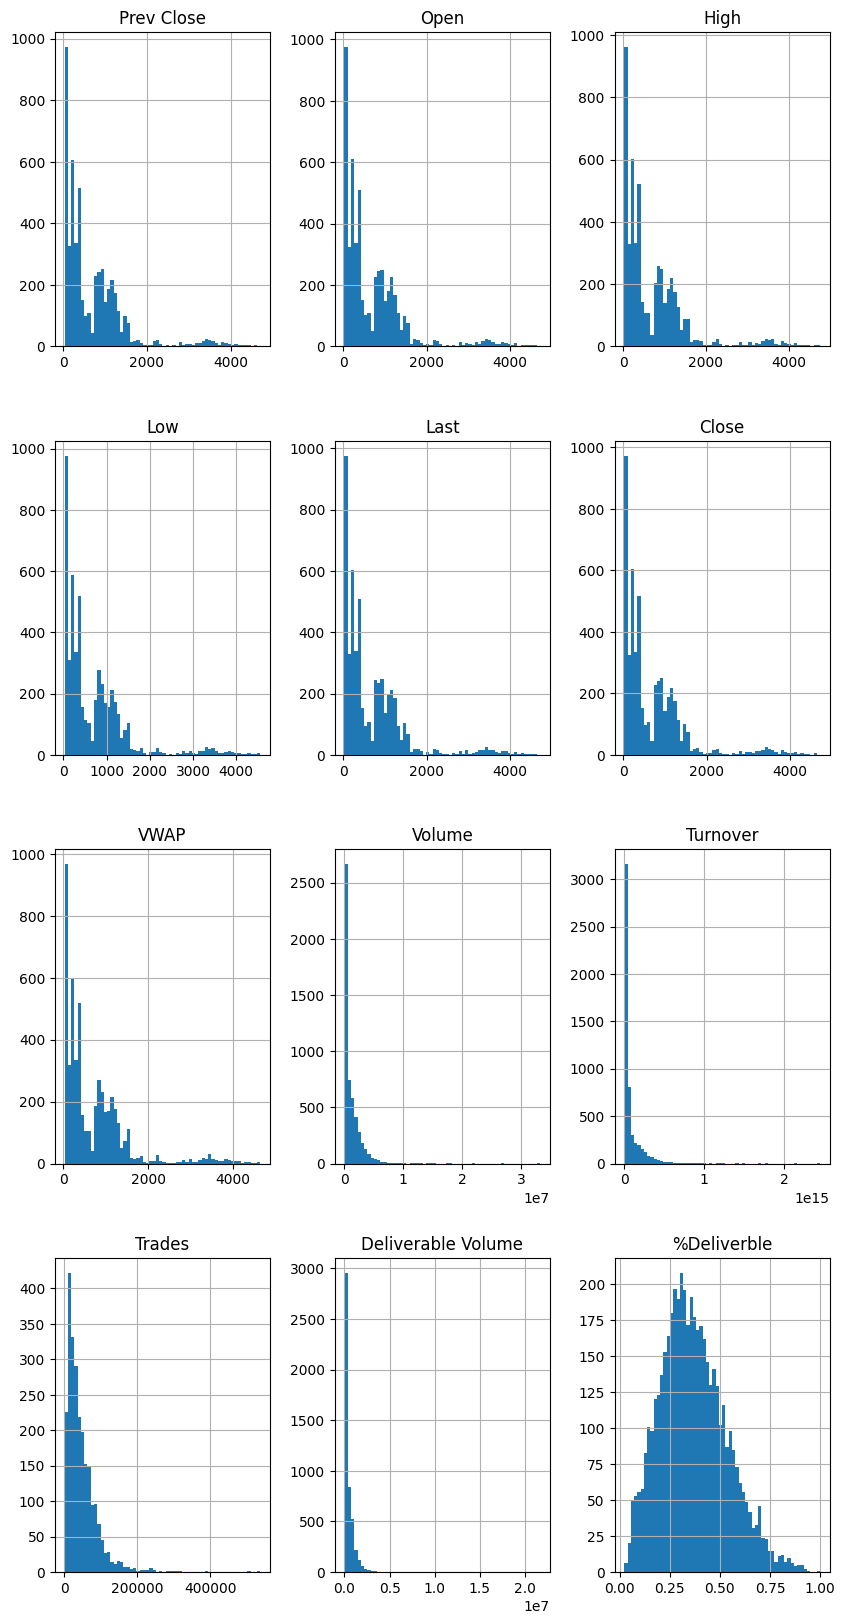

In [17]:
#Make Histogram of All Data set

df.hist(bins=60,figsize=(10,20))

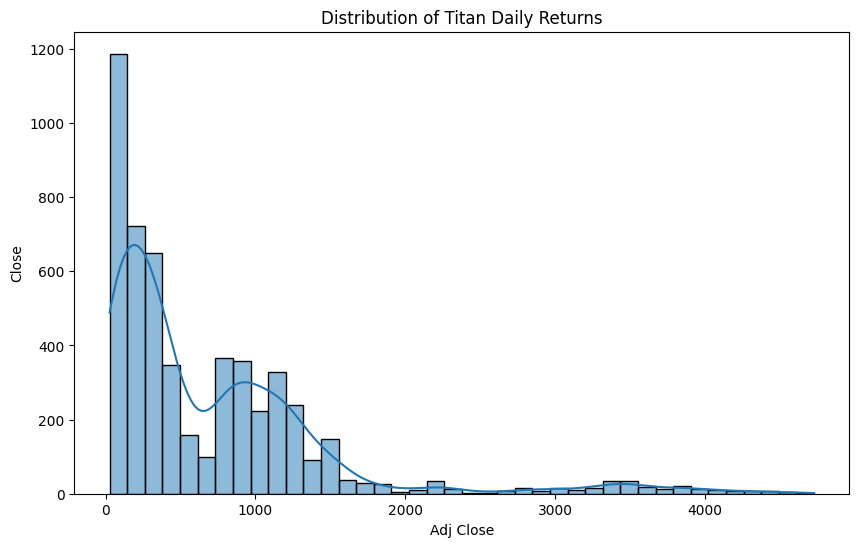

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Open'].dropna(), bins=40, kde=True)
plt.title('Distribution of Titan Daily Returns')
plt.xlabel('Adj Close')
plt.ylabel('Close')
plt.show()

In [19]:
# Plot Titan High Stock Prices

def volume_analysis(df,cmp_name):
    df['High'].plot(figsize=(10,7),title='Titan '+cmp_name+' Stock Prices',c='orange')
    plt.ylabel('Volume')
    plt.show()

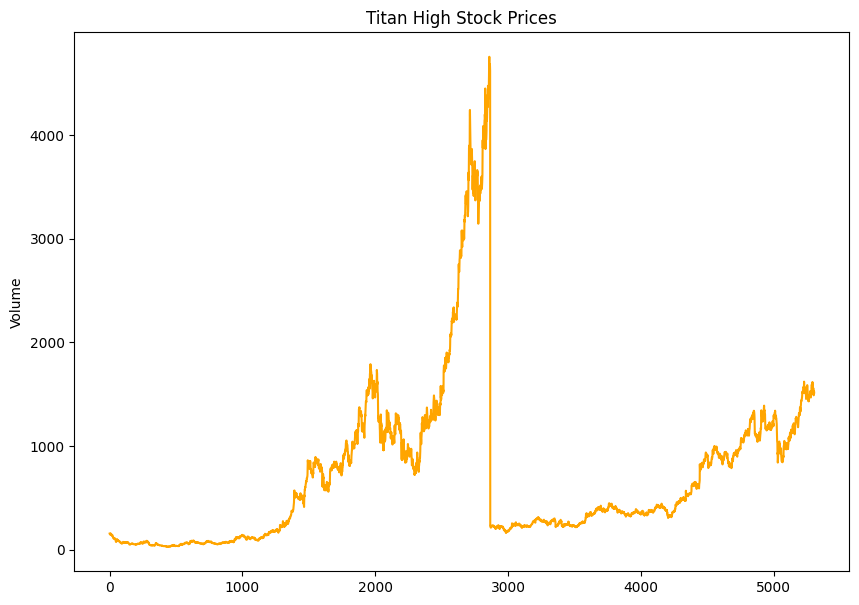

In [20]:
volume_analysis(df,'High')

In [21]:
import tensorflow as tf
print(tf.__version__)

2.15.0


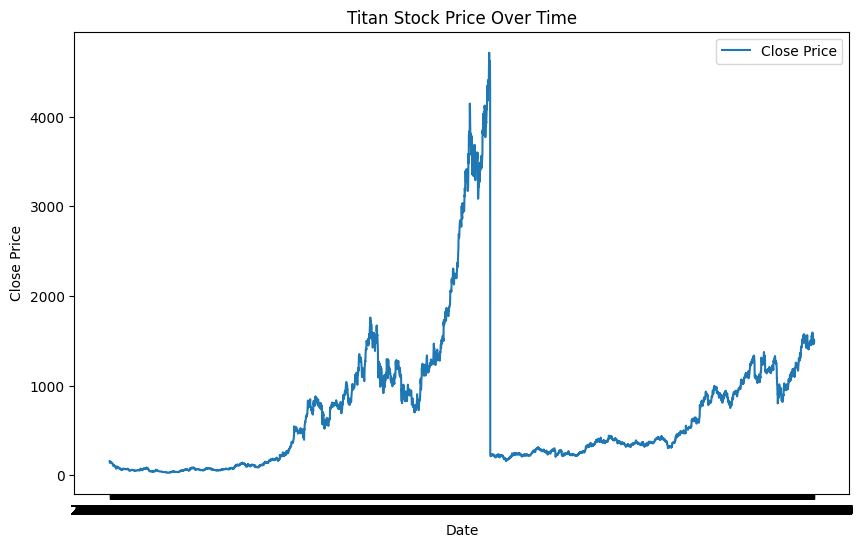

In [22]:
# Visualizations
plt.figure(figsize=(10, 6))
plt.title('Titan Stock Price Over Time')
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

**Step 3: split the dataset into training and testing sets**

In [23]:
# Convert Date to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [24]:
# Sort the dataset by date
df = df.sort_values('Date')

# Set Date as the index
df.set_index('Date', inplace=True)

# Select relevant features for prediction
features = ['Open', 'High', 'Low', 'Close', 'Volume']
df = df[features]

In [25]:
# Handling missing values (if any)
df = df.dropna()

In [26]:
# Define the target variable
X = df.drop('Close', axis=1)
y = df['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Step 4: Comparing and Predicting with differnt Models**

**Linear Regression Model**

In [27]:
# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [28]:
# Predicting the results
y_pred_lr = lr_model.predict(X_test)

In [29]:
# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression Mean Squared Error: {mse_lr}")
print(f"Linear Regression R2 Score: {r2_lr}")

Linear Regression Mean Squared Error: 79.05549800225593
Linear Regression R2 Score: 0.9998693205353096


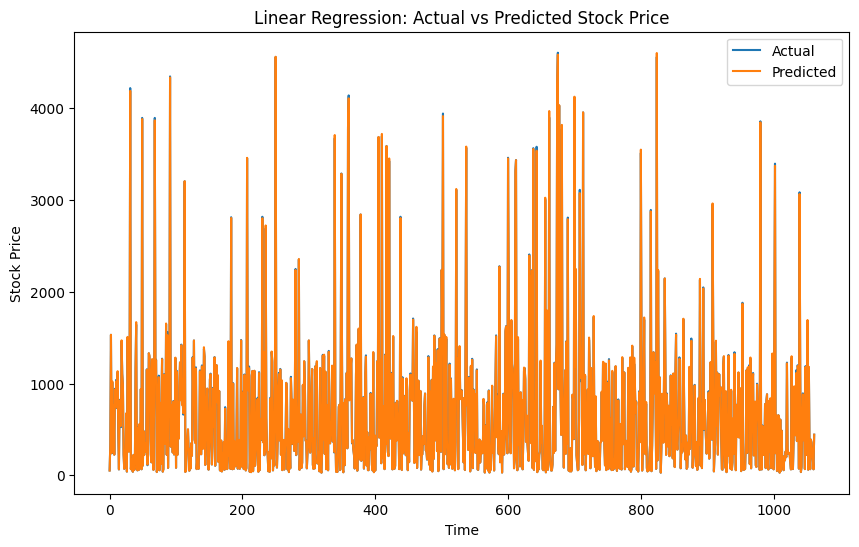

In [30]:
# Stock analysis chart
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred_lr, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Linear Regression: Actual vs Predicted Stock Price')
plt.legend()
plt.show()

**K-Means Clustering**

In [31]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [32]:
# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

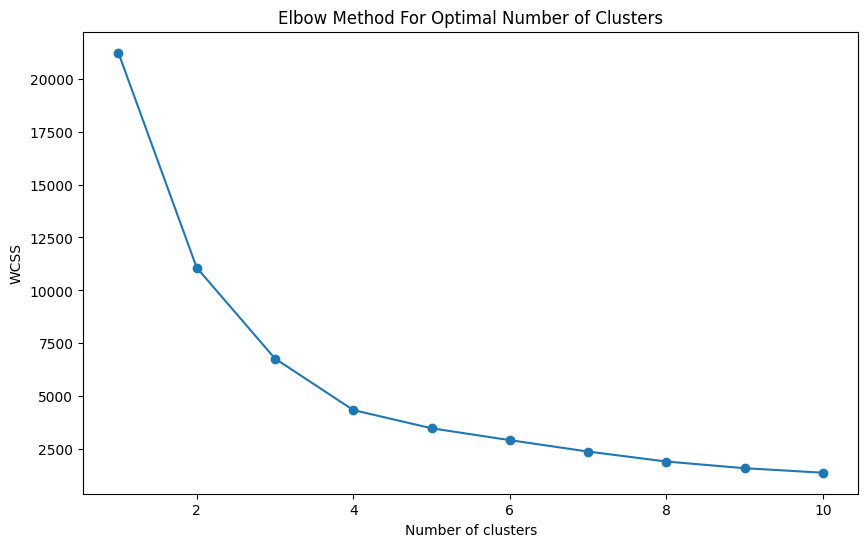

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()

In [34]:
# From the elbow plot, we choose the optimal number of clusters (for example, k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


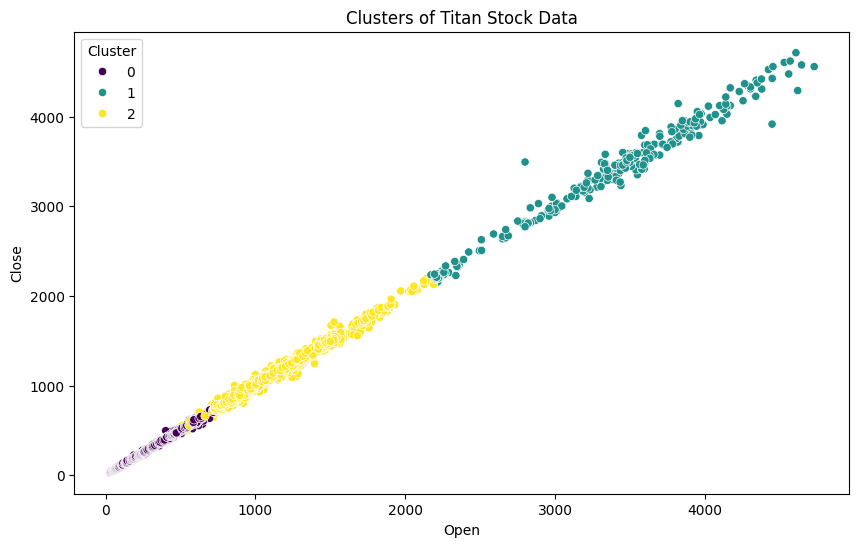

In [35]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Open', y='Close', hue='Cluster', data=df, palette='viridis')
plt.title('Clusters of Titan Stock Data')
plt.show()

**Step 5: CPredicting and Evaluating with Clustering**

In [36]:
# Adding cluster information to the training and test sets
X_train['Cluster'] = kmeans.predict(scaler.transform(X_train))
X_test['Cluster'] = kmeans.predict(scaler.transform(X_test))

# Train a new Linear Regression model using the clusters
lr_model_cluster = LinearRegression()
lr_model_cluster.fit(X_train, y_train)

LinearRegression()

In [37]:
# Predicting the results
y_pred_lr_cluster = lr_model_cluster.predict(X_test)

# Evaluate the model
mse_lr_cluster = mean_squared_error(y_test, y_pred_lr_cluster)
r2_lr_cluster = r2_score(y_test, y_pred_lr_cluster)

In [38]:
print(f"Linear Regression with Clusters Mean Squared Error: {mse_lr_cluster}")
print(f"Linear Regression with Clusters R2 Score: {r2_lr_cluster}")

Linear Regression with Clusters Mean Squared Error: 79.0993138835708
Linear Regression with Clusters R2 Score: 0.9998692481072552


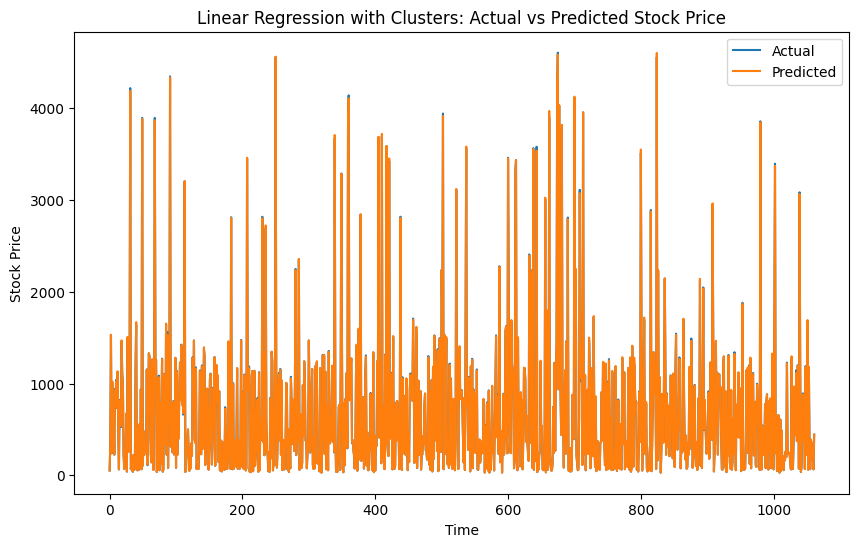

In [39]:
# Stock analysis chart
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred_lr_cluster, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Linear Regression with Clusters: Actual vs Predicted Stock Price')
plt.legend()
plt.show()